## Directorios de falla

In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import get_window, stft
from scipy.io import loadmat
import matplotlib.colors as colors

In [2]:
#Directorios a considerar para la generación de bancos de imágenes para transfer learning.
mydir_normal= r"TL - MFPT/MFPT Fault Data Sets/1 - Three Baseline Conditions"
mydir_outer= r"TL - MFPT/MFPT Fault Data Sets/2 - Three Outer Race Fault Conditions"
mydir_outer2= r"TL - MFPT/MFPT Fault Data Sets/3 - Seven More Outer Race Fault Conditions"
mydir_inner= r"TL - MFPT/MFPT Fault Data Sets/4 - Seven Inner Race Fault Conditions"


In [3]:
#Visualización de algunos datos.
import os
import scipy.io as sio
import matplotlib.pyplot as plt

# Directorio de la carpeta con los archivos .mat
mydir_normal = r"TL - MFPT/MFPT Fault Data Sets/1 - Three Baseline Conditions"

# Lista para almacenar los datos de vibración
vibration_data = []

# Iterar sobre los archivos en la carpeta
for filename in os.listdir(mydir_normal):
    if filename.endswith('.mat'):
        # Cargar el archivo .mat
        file_path = os.path.join(mydir_normal, filename)
        mat_data = sio.loadmat(file_path)
        
        # Extraer los datos de vibración
        vibration = mat_data['bearing']['gs'].tolist()
        vibration_data.extend(vibration)


### Caracteristicas de los archivos.

In [4]:
import os
import scipy.io as sio

def caracteristicas_archivos(mydir):
    # Iterar sobre los archivos en el directorio
    for filename in os.listdir(mydir):
        if filename.endswith('.mat'):
            # Cargar el archivo .mat
            file_path = os.path.join(mydir, filename)
            mat_data = sio.loadmat(file_path)
            
            print("Archivo:", filename)
            print("Características:")
            bearing_data = mat_data.get('bearing')
            if bearing_data is not None:
                for key in ['sr', 'load', 'rate']:
                    if key in bearing_data.dtype.names:
                        data = bearing_data[key][0][0][0][0]
                        print(f" - {key}: {data}")
            
            print("-" * 50)

In [5]:
caracteristicas_archivos(mydir_normal)

Archivo: baseline_1.mat
Características:
 - sr: 97656
 - load: 270
 - rate: 25
--------------------------------------------------
Archivo: baseline_2.mat
Características:
 - sr: 97656
 - load: 270
 - rate: 25
--------------------------------------------------
Archivo: baseline_3.mat
Características:
 - sr: 97656
 - load: 270
 - rate: 25
--------------------------------------------------


In [6]:
caracteristicas_archivos(mydir_outer)

Archivo: OuterRaceFault_1.mat
Características:
 - sr: 97656
 - load: 270
 - rate: 25
--------------------------------------------------
Archivo: OuterRaceFault_2.mat
Características:
 - sr: 97656
 - load: 270
 - rate: 25
--------------------------------------------------
Archivo: OuterRaceFault_3.mat
Características:
 - sr: 97656
 - load: 270
 - rate: 25
--------------------------------------------------


In [7]:
caracteristicas_archivos(mydir_outer2)

Archivo: OuterRaceFault_vload_1.mat
Características:
 - sr: 48828
 - load: 2
 - rate: 25
--------------------------------------------------
Archivo: OuterRaceFault_vload_2.mat
Características:
 - sr: 48828
 - load: 5
 - rate: 25
--------------------------------------------------
Archivo: OuterRaceFault_vload_3.mat
Características:
 - sr: 48828
 - load: 1
 - rate: 25
--------------------------------------------------
Archivo: OuterRaceFault_vload_4.mat
Características:
 - sr: 48828
 - load: 1
 - rate: 25
--------------------------------------------------
Archivo: OuterRaceFault_vload_5.mat
Características:
 - sr: 48828
 - load: 2
 - rate: 25
--------------------------------------------------
Archivo: OuterRaceFault_vload_6.mat
Características:
 - sr: 48828
 - load: 2
 - rate: 25
--------------------------------------------------
Archivo: OuterRaceFault_vload_7.mat
Características:
 - sr: 48828
 - load: 3
 - rate: 25
--------------------------------------------------


In [8]:
caracteristicas_archivos(mydir_inner)

Archivo: InnerRaceFault_vload_1.mat
Características:
 - sr: 48828
 - load: 0
 - rate: 25
--------------------------------------------------
Archivo: InnerRaceFault_vload_2.mat
Características:
 - sr: 48828
 - load: 5
 - rate: 25
--------------------------------------------------
Archivo: InnerRaceFault_vload_3.mat
Características:
 - sr: 48828
 - load: 1
 - rate: 25
--------------------------------------------------
Archivo: InnerRaceFault_vload_4.mat
Características:
 - sr: 48828
 - load: 1
 - rate: 25
--------------------------------------------------
Archivo: InnerRaceFault_vload_5.mat
Características:
 - sr: 48828
 - load: 2
 - rate: 25
--------------------------------------------------
Archivo: InnerRaceFault_vload_6.mat
Características:
 - sr: 48828
 - load: 2
 - rate: 25
--------------------------------------------------
Archivo: InnerRaceFault_vload_7.mat
Características:
 - sr: 48828
 - load: 3
 - rate: 25
--------------------------------------------------


### Obtener datos de vibración

In [9]:
def get_vibration_data(directory):
    # Lista para almacenar los datos de vibración
    vibration_data = []
    
    # Iterar sobre los archivos en el directorio
    for filename in os.listdir(directory):
        if filename.endswith('.mat'):
            # Cargar el archivo .mat
            file_path = os.path.join(directory, filename)
            mat_data = sio.loadmat(file_path)
            
            # Extraer los datos de vibración
            vibration = mat_data['bearing']['gs'].tolist()
            vibration_data.extend(vibration)
    
    return vibration_data

In [10]:
vibraciones_normal = get_vibration_data(mydir_normal)
vibraciones_outer = get_vibration_data(mydir_outer)
vibraciones_outer2 = get_vibration_data(mydir_outer2)
vibraciones_inner = get_vibration_data(mydir_inner)

In [11]:
print(np.shape(vibraciones_normal))
print(np.shape(vibraciones_outer))
print(np.shape(vibraciones_outer2))
print(np.shape(vibraciones_inner))

(3, 1, 585936, 1)
(3, 1, 585936, 1)
(7, 1, 146484, 1)
(7, 1, 146484, 1)


In [12]:
#Visualizar las keys load y sampling rate y velocidad del eje
#rate = vel.eje
#sr = frecuencia de sampleo
#gs = señal de vibración
#load = carga en lbs.

mat_data['bearing'].dtype.fields.keys()

dict_keys(['sr', 'gs', 'load', 'rate'])

In [13]:
import numpy as np 
np.shape(vibration_data)

(3, 1, 585936, 1)

In [14]:
range(len(vibraciones_inner))

range(0, 7)

In [15]:
np.shape(vibration_data[i])

NameError: name 'i' is not defined

## Visualización señales de vibración para cada archivo.

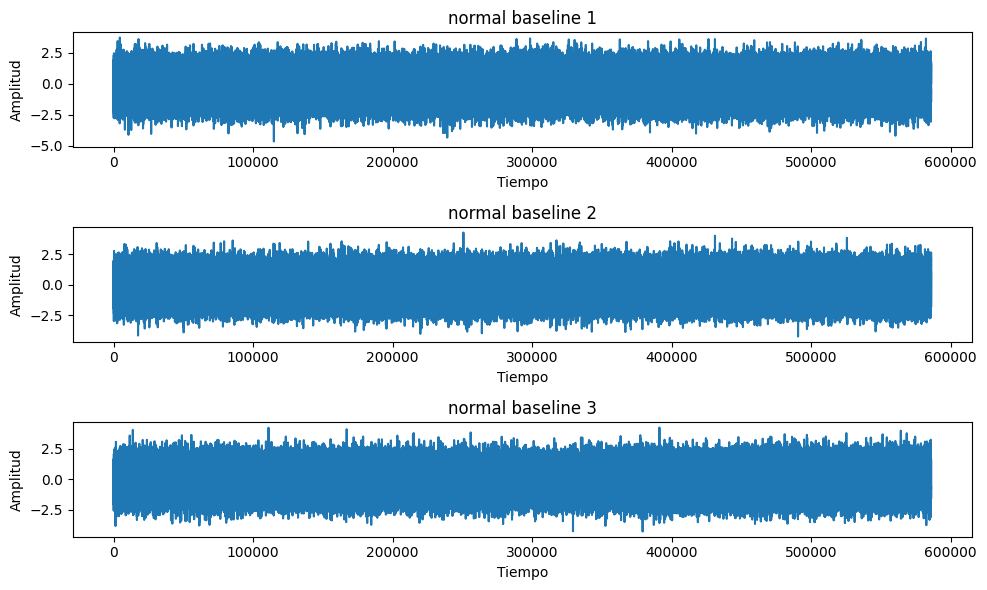

In [16]:
# Crear subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 6))

# Visualizar la señal de vibración en cada subplot
for i in range(len(vibraciones_normal)):
    axs[i].plot(vibraciones_normal[i][0])
    axs[i].set_xlabel('Tiempo')
    axs[i].set_ylabel('Amplitud')
    axs[i].set_title('normal baseline {}'.format(i+1))

# Ajustar los espacios entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

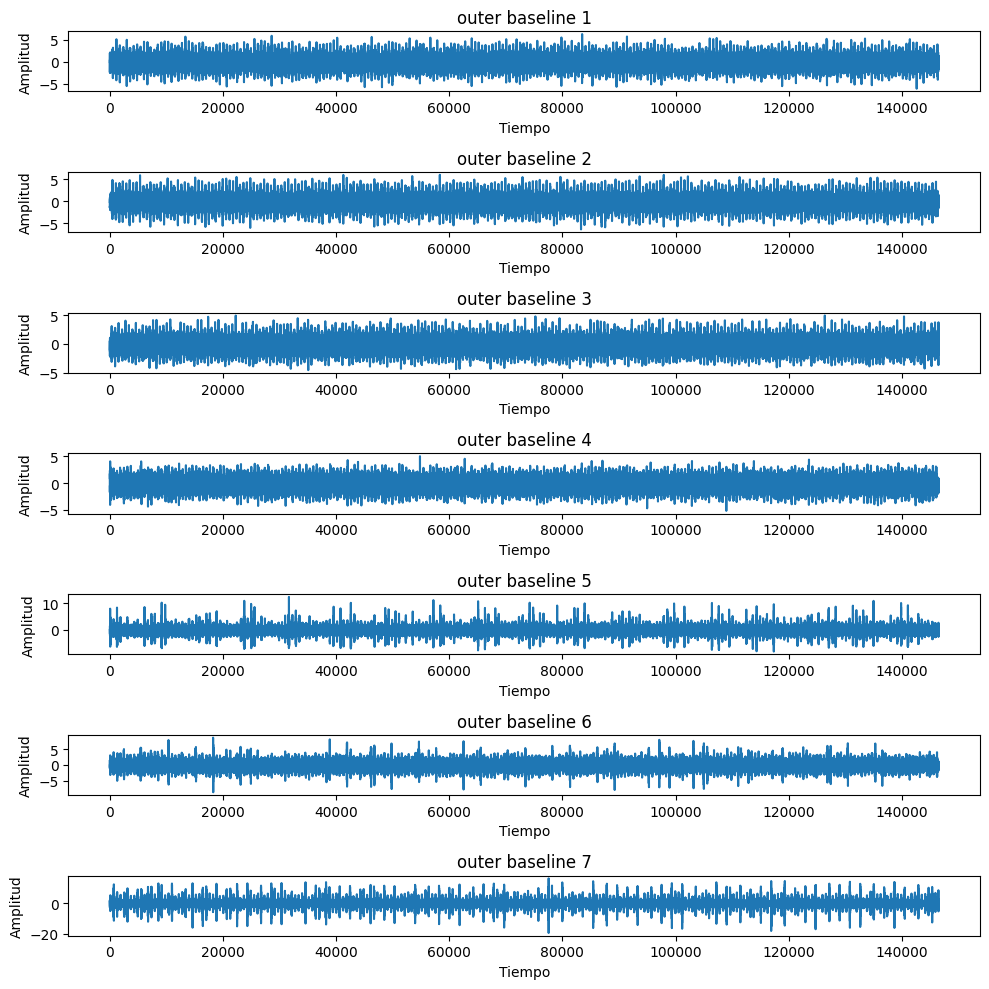

In [17]:
# Crear subplots
fig, axs = plt.subplots(7, 1, figsize=(10, 10))

# Visualizar la señal de vibración en cada subplot
for i in range(len(vibraciones_outer2)):
    axs[i].plot(vibraciones_outer2[i][0])
    axs[i].set_xlabel('Tiempo')
    axs[i].set_ylabel('Amplitud')
    axs[i].set_title('outer baseline {}'.format(i+1))

# Ajustar los espacios entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

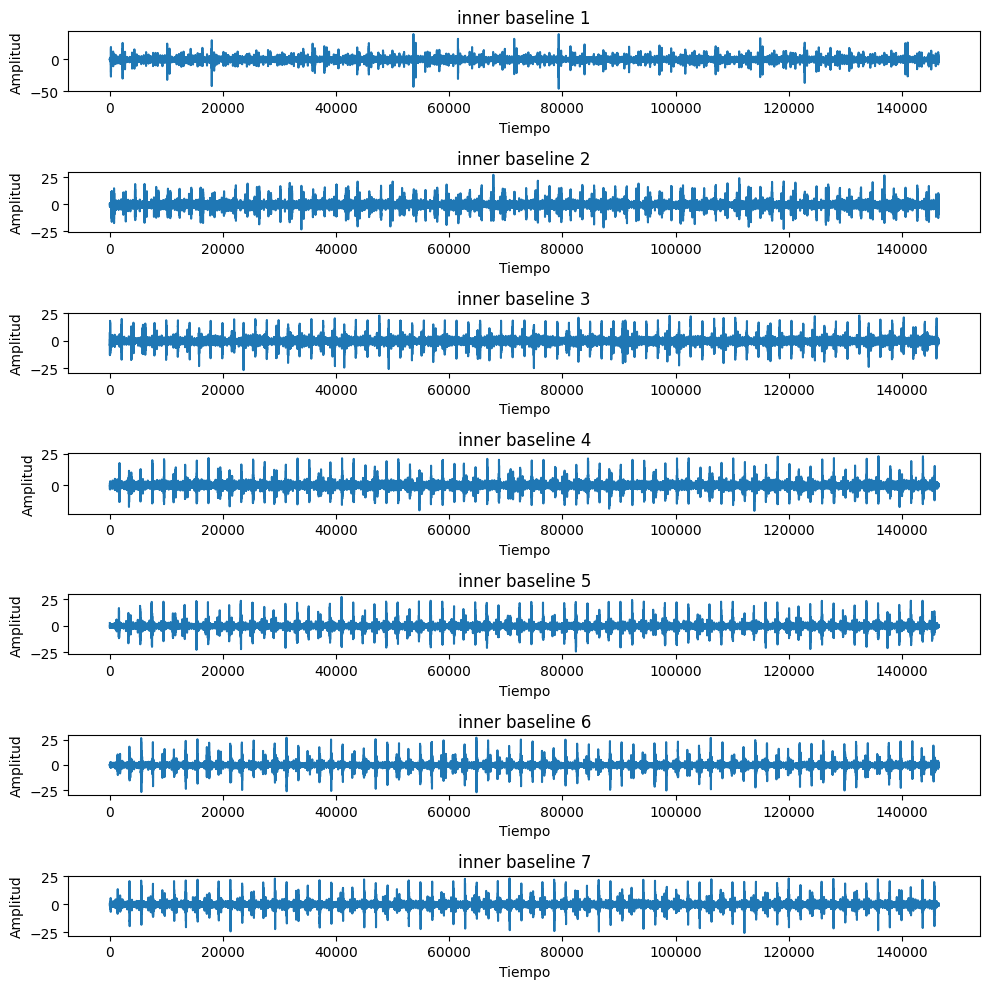

In [18]:
# Crear subplots
fig, axs = plt.subplots(7, 1, figsize=(10, 10))

# Visualizar la señal de vibración en cada subplot
for i in range(len(vibraciones_inner)):
    axs[i].plot(vibraciones_inner[i][0])
    axs[i].set_xlabel('Tiempo')
    axs[i].set_ylabel('Amplitud')
    axs[i].set_title('inner baseline {}'.format(i+1))

# Ajustar los espacios entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

### Obtener número de puntos de sampleo correspondientes a 10 giros ejes.

In [40]:
#Definir número de giros del eje.
giros_eje = 10

In [41]:
#Outer
fs_outer2 = len(vibraciones_outer2[1][0])/3
frecuencia_giro = 25 #Hz o 25 vueltas en 1 segundo
giros_tiempo_outer2 = 1 *giros_eje/ frecuencia_giro
numero_puntos_giros_outer2 = fs_outer2*giros_tiempo_outer2
num_imagenes_outer2 = len(vibraciones_outer2[1][0])/numero_puntos_giros_outer2
print('------Outer:------')
print(f'Frecuencia de sampleo:{fs_outer2} Hz ')
print(f'Longitud total de puntos de la señal: {len(vibraciones_outer2[1][0])}')
print(f'Tiempo para {giros_eje} giros del eje : {giros_tiempo_outer2} s')
print(f'Número de puntos: {numero_puntos_giros_outer2}')
print(f'Número de imagenes que se pueden generar: {num_imagenes_outer2}')

------Outer:------
Frecuencia de sampleo:48828.0 Hz 
Longitud total de puntos de la señal: 146484
Tiempo para 10 giros del eje : 0.4 s
Número de puntos: 19531.2
Número de imagenes que se pueden generar: 7.5


In [42]:
#Inner
fs_inner = len(vibraciones_inner[1][0])/3
frecuencia_giro = 25 #Hz o 25 vueltas en 1 segundo
giros_tiempo_inner = 1 *giros_eje/ frecuencia_giro
numero_puntos_giros_inner = fs_inner*giros_tiempo_inner
num_imagenes_inner = len(vibraciones_inner[1][0])/numero_puntos_giros_inner
print('------Inner:------')
print(f'Frecuencia de sampleo:{fs_inner} Hz ')
print(f'Longitud total de puntos de la señal: {len(vibraciones_inner[1][0])}')
print(f'Tiempo para {giros_eje} giros del eje : {giros_tiempo_inner} s')
print(f'Número de puntos: {numero_puntos_giros_inner}')
print(f'Número de imagenes que se pueden generar: {num_imagenes_inner}')

------Inner:------
Frecuencia de sampleo:48828.0 Hz 
Longitud total de puntos de la señal: 146484
Tiempo para 10 giros del eje : 0.4 s
Número de puntos: 19531.2
Número de imagenes que se pueden generar: 7.5


In [43]:
#Normal
fs_normal = len(vibraciones_normal[1][0])/6
frecuencia_giro = 25 #Hz o 25 vueltas en 1 segundo
giros_tiempo_normal = 1 *giros_eje/ frecuencia_giro
numero_puntos_giros_normal = fs_normal*giros_tiempo_normal
num_imagenes_normal = len(vibraciones_normal[1][0])/numero_puntos_giros_normal
print('------Normal:------')
print(f'Frecuencia de sampleo:{fs_normal} Hz ')
print(f'Longitud total de puntos de la señal: {len(vibraciones_normal[1][0])}')
print(f'Tiempo para {giros_eje} giros del eje : {giros_tiempo_normal} s')
print(f'Número de puntos: {numero_puntos_giros_normal}')
print(f'Número de imagenes que se pueden generar: {num_imagenes_normal}')

------Normal:------
Frecuencia de sampleo:97656.0 Hz 
Longitud total de puntos de la señal: 585936
Tiempo para 10 giros del eje : 0.4 s
Número de puntos: 39062.4
Número de imagenes que se pueden generar: 15.0


In [44]:
numero_puntos_giros_normal

39062.4

In [45]:
len(vibraciones_normal[1][0])/numero_puntos_giros_normal

15.0

In [46]:
#Total de imagenes posibles a generar
total_im_normal = num_imagenes_normal*3
total_im_inner = num_imagenes_inner*7
total_im_outer2 = num_imagenes_outer2*7
print(f'Normal: {total_im_normal}')
print(f'Inner: {total_im_inner}')
print(f'Outer: {total_im_outer2}')
print(f'Total: {total_im_outer2 + total_im_inner + total_im_normal}')

Normal: 45.0
Inner: 52.5
Outer: 52.5
Total: 150.0


### Calculo de la longitud de ventana para STFT.

In [47]:
#De lo obtenido en resultados 1.
n_puntos_resultados1 = 16384
fs_resultados1 = 200000
t_ventana = n_puntos_resultados1/fs_resultados1
print(f'Tiempo ventana STFT : {t_ventana } s')

Tiempo ventana STFT : 0.08192 s


In [27]:
#Transformación para normal, outer y inner.

n_puntos_normal = t_ventana*fs_normal
n_puntos_inner = t_ventana*fs_inner
n_puntos_outer = t_ventana*fs_outer2
print('Número de puntos')
print('Normal', n_puntos_normal)
print('Inner', n_puntos_inner)
print('Outer', n_puntos_outer)

Número de puntos
Normal 7999.979520000001
Inner 3999.9897600000004
Outer 3999.9897600000004


### Ancho de ventana STFT:

Normal = 8000 puntos.
Inner = 4000
Outer = 4000

In [28]:
vibraciones_normal = get_vibration_data(mydir_normal)
vibraciones_outer = get_vibration_data(mydir_outer)
vibraciones_outer2 = get_vibration_data(mydir_outer2)
vibraciones_inner = get_vibration_data(mydir_inner)

In [29]:
print(np.shape(vibraciones_normal))

(3, 1, 585936, 1)


In [30]:
flat = np.array(vibraciones_normal[1]).flatten()

In [31]:
type(flat)

numpy.ndarray

In [32]:
np.shape(flat)

(585936,)

In [33]:
flat

array([ 0.3685337, -0.3983136, -1.303466 , ..., -0.3402303,  1.109699 ,
        1.013209 ])

In [34]:
flat

array([ 0.3685337, -0.3983136, -1.303466 , ..., -0.3402303,  1.109699 ,
        1.013209 ])

In [35]:
segmentos = dividir_senal_en_segmentos(flat,11718)
np.shape(segmentos)

NameError: name 'dividir_senal_en_segmentos' is not defined

### Generar banco de imagenes

In [36]:
def bancoimagenes_ventana_giros(vibracion, ruta, ancho_ventana, frecuencia,num_puntos_giros,etiqueta):
    for numero in range(len(vibracion)):
        vibracion_numero =  np.array(vibracion[numero]).flatten()
        signal_div = dividir_senal_en_segmentos(vibracion_numero,num_puntos_giros) #Divide la señal
        for j in range(len(signal_div)): 
            stft_LOCAL_COLOR(signal_div[j,:], 'hamming', ancho_ventana, frecuencia, ruta, 
                             etiqueta + f'ver {numero}', j)
        

In [37]:
#Función 1: Normalización Local.Función que guarda la imagen generada por el espectrograma.
def stft_LOCAL_COLOR(signal, window, window_size, sample_rate, ruta_carpeta, etiqueta, numero):
    #Tipo de ventana
    window_func = get_window(window, window_size)
    
    #STFT
    f, t, Zxx = stft(signal, fs=sample_rate, window=window_func, nperseg=window_size)
    max_amp = np.max(np.abs(Zxx))
        
    # Plot de espectrograma Tiempo-Frecuencia.
    plt.pcolormesh(t, f, np.abs(Zxx), cmap='gray', vmin=0, vmax= max_amp)
    plt.axis('off')
    
    # Guardar imagen en carpeta
    if ruta_carpeta:
        if not os.path.exists(ruta_carpeta):
            os.makedirs(ruta_carpeta)
        
    # Crear la ruta completa del archivo de imagen
    save_file = os.path.join(ruta_carpeta, f'{etiqueta}_{numero}.png')
    
    plt.savefig(save_file)
    plt.close()

In [38]:
def dividir_senal_en_segmentos(senal, tamano_segmento):
    segmentos = []
    for i in range(0, len(senal), tamano_segmento):
        segmento = senal[i:i+tamano_segmento]
        if len(segmento) == tamano_segmento:
            segmentos.append(segmento)
    segmentos = np.asarray(segmentos)
    shape = np.shape(segmentos)
    segmentos = segmentos.reshape(shape[0],shape[1])
    return segmentos

### Generación imagenes banco para caso 1 - 10 giros del eje - 143 img

In [48]:
bancoimagenes_ventana_giros(vibraciones_normal, ruta = 'banco_mfpt/banco_transfer_mfpt_10giros', ancho_ventana = 1024, frecuencia = fs_normal
                            , num_puntos_giros = 39062, etiqueta = 'normal_')

bancoimagenes_ventana_giros(vibraciones_inner, ruta = 'banco_mfpt/banco_transfer_mfpt_10giros', ancho_ventana = 1024, frecuencia = fs_inner
                            , num_puntos_giros = 19531, etiqueta = 'inner_')

bancoimagenes_ventana_giros(vibraciones_outer2, ruta = 'banco_mfpt/banco_transfer_mfpt_10giros', ancho_ventana = 1024, frecuencia = fs_outer2
                            , num_puntos_giros = 19531, etiqueta = 'outer_')

### Generación imagenes banco para caso 2 - 3 giros del eje - 500 img

In [39]:
bancoimagenes_ventana_giros(vibraciones_normal, ruta = 'banco_mfpt/banco_transfer_mfpt_3giros', ancho_ventana = 1024, frecuencia = fs_normal
                            , num_puntos_giros = 11718, etiqueta = 'normal_')

bancoimagenes_ventana_giros(vibraciones_inner, ruta = 'banco_mfpt/banco_transfer_mfpt_3giros', ancho_ventana = 1024, frecuencia = fs_inner
                            , num_puntos_giros = 5859, etiqueta = 'inner_')

bancoimagenes_ventana_giros(vibraciones_outer2, ruta = 'banco_mfpt/banco_transfer_mfpt_3giros', ancho_ventana = 1024, frecuencia = fs_outer2
                            , num_puntos_giros = 5859, etiqueta = 'outer_')

### Preprocesamiento

In [18]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from os import listdir
from os.path import join
from PIL import Image
from sklearn.model_selection import train_test_split
import keras
import pandas as pd
import glob

In [2]:

def prepros_bancoimagenes(mydir, test_size, val_size):
    #Lectura en array de imagenes, preprocesamiento a grises y reescalamiento a 128x128
    X = [] 
    for name in listdir(mydir) :
        path = join( mydir,name) 
        data = Image.open(path).convert('L')
        data = data.resize((128,128))
        data = np.array(data)
        X.append(data) 
    X = np.array(X) 
    print(X.shape) 

    y =[]
    for name in listdir(mydir) :
        path = join( mydir,name) 
        if name[0] == 'n':
            y.append(0)
        if name[0] == 'i':
            y.append(1)
        if name[0] == 'o':
            y.append(2)
    y = np.array(y) 
    print(y.shape) 
    
    # Dividir datos de test y entrenamiento.
    x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify = y)
    
    #Dividir los datos de train en entrenamiento y validación.
    x_train,x_val,y_train,y_val = train_test_split(x_train, y_train, test_size=val_size, random_state=42, stratify = y_train)
    
    #Normalización
    x_train = x_train.astype("float32") / 255
    x_val= x_val.astype("float32") / 255
    x_test = x_test.astype("float32") / 255
    
    #Agregar dimensión extra
    x_train = np.expand_dims(x_train, -1) 
    x_val = np.expand_dims(x_val, -1) 
    x_test = np.expand_dims(x_test, -1) 
    
    #One hot encoder
    y_train = keras.utils.to_categorical(y_train, 3)
    y_val = keras.utils.to_categorical(y_val, 3)
    y_test = keras.utils.to_categorical(y_test, 3)

    return x_train, x_test, x_val, y_train, y_test, y_val

In [3]:
mydir = r"banco_mfpt/banco_transfer_mfpt_10giros"
mydir2 = r"banco_mfpt/banco_transfer_mfpt_3giros"
test_size = 0.7
val_size = 0.1


In [4]:
x_train, x_test, x_val, y_train, y_test, y_val = prepros_bancoimagenes(mydir, test_size, val_size)

(143, 128, 128)
(143,)


In [67]:
print(x_train.shape)
print(x_test.shape) 
print(x_val.shape) 

(37, 128, 128, 1)
(101, 128, 128, 1)
(5, 128, 128, 1)


### Transfer learning caso 1:
- Pocas imagenes para entrenar y testear, total de 143 imagenes, 102 entrenamiento, 29 test y 12 validación.

In [68]:
epochs = 10
batch = 32

In [69]:

# Carga el modelo previamente entrenado
modelo_pre_entrenado = tf.keras.models.load_model('resultados-cnn/models/LOCAL-10giros-16384_iter_8.h5')
modelo_pre_entrenado.trainable = False
print(modelo_pre_entrenado.summary())


Model: "sequential_318"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_636 (Conv2D)         (None, 124, 124, 64)      1664      
                                                                 
 max_pooling2d_636 (MaxPooli  (None, 62, 62, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_637 (Conv2D)         (None, 62, 62, 32)        51232     
                                                                 
 max_pooling2d_637 (MaxPooli  (None, 31, 31, 32)       0         
 ng2D)                                                           
                                                                 
 flatten_318 (Flatten)       (None, 30752)             0         
                                                                 
 dense_636 (Dense)           (None, 512)            

In [70]:
from tensorflow.keras import layers
base_inputs = modelo_pre_entrenado.layers[0].input
base_outputs = modelo_pre_entrenado.layers[-4].output

x = layers.Dense(512, activation='relu')(base_outputs)
x = layers.Dropout(0.4)(x)
output = layers.Dense(3, activation='softmax')(x)

new_model = tf.keras.Model(inputs=base_inputs, outputs=output)
print(new_model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_636_input (InputLaye  [(None, 128, 128, 1)]    0         
 r)                                                              
                                                                 
 conv2d_636 (Conv2D)         (None, 124, 124, 64)      1664      
                                                                 
 max_pooling2d_636 (MaxPooli  (None, 62, 62, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_637 (Conv2D)         (None, 62, 62, 32)        51232     
                                                                 
 max_pooling2d_637 (MaxPooli  (None, 31, 31, 32)       0         
 ng2D)                                                           
                                                             

In [71]:
new_model.compile(optimizer='adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])
hist = new_model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs, batch_size=batch, verbose = 1)
    
loss, accuracy = new_model.evaluate(x_test, y_test)
print('Loss:', loss)
print('Accuracy:', accuracy)

Epoch 1/10
2/2 [==============================] - 9s 296ms/step - loss: 1.0403 - accuracy: 0.5135 - val_loss: 0.4657 - val_accuracy: 0.8000
Epoch 2/10
2/2 [==============================] - 0s 42ms/step - loss: 0.4951 - accuracy: 0.7838 - val_loss: 0.3008 - val_accuracy: 1.0000
Epoch 3/10
2/2 [==============================] - 0s 44ms/step - loss: 0.2862 - accuracy: 0.9459 - val_loss: 0.2338 - val_accuracy: 1.0000
Epoch 4/10
2/2 [==============================] - 0s 35ms/step - loss: 0.1737 - accuracy: 0.9730 - val_loss: 0.2173 - val_accuracy: 1.0000
Epoch 5/10
2/2 [==============================] - 0s 44ms/step - loss: 0.1128 - accuracy: 1.0000 - val_loss: 0.1688 - val_accuracy: 1.0000
Epoch 6/10
2/2 [==============================] - 0s 41ms/step - loss: 0.0702 - accuracy: 1.0000 - val_loss: 0.0779 - val_accuracy: 1.0000
Epoch 7/10
2/2 [==============================] - 0s 42ms/step - loss: 0.0331 - accuracy: 1.0000 - val_loss: 0.0520 - val_accuracy: 1.0000
Epoch 8/10
2/2 [==========

In [73]:
#Guardar modelo 
os.makedirs('resultados-transfer', exist_ok=True)
new_model.save(os.path.join('resultados-transfer/resultados-transfer_caso1_train30_test70.h5'))
    
os.makedirs('resultados-transfer', exist_ok=True)
hist_df = pd.DataFrame(hist.history)
hist_df.to_csv(os.path.join('resultados-transfer/history-transfer_caso1_train30_test70.csv'))

### Transfer learning caso 2:
- Pocas imagenes para entrenar y muchas para testear, total de 500 imagenes, 135 entrenamiento, 350 test y 15 validación.

In [5]:
x_train2, x_test2, x_val2, y_train2, y_test2, y_val2 = prepros_bancoimagenes(mydir2, 0.7, 0.1)

(500, 128, 128)
(500,)


In [77]:
print(x_train2.shape)
print(x_test2.shape) 
print(x_val2.shape) 

(135, 128, 128, 1)
(350, 128, 128, 1)
(15, 128, 128, 1)


In [24]:
print(x_train.shape)
print(x_test.shape) 
print(x_val.shape) 

(37, 128, 128, 1)
(101, 128, 128, 1)
(5, 128, 128, 1)


In [78]:
epochs = 10
batch = 32

In [79]:
# Carga el modelo previamente entrenado
modelo_pre_entrenado = tf.keras.models.load_model('resultados-cnn/models/LOCAL-10giros-16384_iter_8.h5')
modelo_pre_entrenado.trainable = False
print(modelo_pre_entrenado.summary())


Model: "sequential_318"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_636 (Conv2D)         (None, 124, 124, 64)      1664      
                                                                 
 max_pooling2d_636 (MaxPooli  (None, 62, 62, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_637 (Conv2D)         (None, 62, 62, 32)        51232     
                                                                 
 max_pooling2d_637 (MaxPooli  (None, 31, 31, 32)       0         
 ng2D)                                                           
                                                                 
 flatten_318 (Flatten)       (None, 30752)             0         
                                                                 
 dense_636 (Dense)           (None, 512)            

In [ ]:
# Carga el modelo previamente entrenado
modelo_pre_entrenado = tf.keras.models.load_model('resultados-cnn/models/LOCAL-10giros-16384_iter_8.h5')
modelo_pre_entrenado.trainable = False

from tensorflow.keras import layers
base_inputs = modelo_pre_entrenado.layers[0].input
base_outputs = modelo_pre_entrenado.layers[-4].output

x = layers.Dense(512, activation='relu')(base_outputs)
x = layers.Dropout(0.4)(x)
output = layers.Dense(3, activation='softmax')(x)

new_model2 = tf.keras.Model(inputs=base_inputs, outputs=output)

In [80]:
from tensorflow.keras import layers
base_inputs = modelo_pre_entrenado.layers[0].input
base_outputs = modelo_pre_entrenado.layers[-4].output

x = layers.Dense(512, activation='relu')(base_outputs)
x = layers.Dropout(0.4)(x)
output = layers.Dense(3, activation='softmax')(x)

new_model2 = tf.keras.Model(inputs=base_inputs, outputs=output)

new_model2.compile(optimizer='adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])
hist2 = new_model2.fit(x_train2, y_train2, validation_data=(x_val2, y_val2), epochs=10, batch_size=32, verbose = 1)

print(new_model2.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_636_input (InputLaye  [(None, 128, 128, 1)]    0         
 r)                                                              
                                                                 
 conv2d_636 (Conv2D)         (None, 124, 124, 64)      1664      
                                                                 
 max_pooling2d_636 (MaxPooli  (None, 62, 62, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_637 (Conv2D)         (None, 62, 62, 32)        51232     
                                                                 
 max_pooling2d_637 (MaxPooli  (None, 31, 31, 32)       0         
 ng2D)                                                           
                                                           

In [81]:
new_model2.compile(optimizer='adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])
hist2 = new_model2.fit(x_train2, y_train2, validation_data=(x_val2, y_val2), epochs=10, batch_size=32, verbose = 1)
    
loss2, accuracy2 = new_model2.evaluate(x_test2, y_test2)
print('Loss:', loss2)
print('Accuracy:', accuracy2)

Epoch 1/10
5/5 [==============================] - 1s 75ms/step - loss: 0.6622 - accuracy: 0.6074 - val_loss: 0.1602 - val_accuracy: 1.0000
Epoch 2/10
5/5 [==============================] - 0s 13ms/step - loss: 0.1304 - accuracy: 1.0000 - val_loss: 0.0425 - val_accuracy: 1.0000
Epoch 3/10
5/5 [==============================] - 0s 13ms/step - loss: 0.0328 - accuracy: 1.0000 - val_loss: 0.0133 - val_accuracy: 1.0000
Epoch 4/10
5/5 [==============================] - 0s 13ms/step - loss: 0.0122 - accuracy: 1.0000 - val_loss: 0.0074 - val_accuracy: 1.0000
Epoch 5/10
5/5 [==============================] - 0s 14ms/step - loss: 0.0101 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 6/10
5/5 [==============================] - 0s 13ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 7/10
5/5 [==============================] - 0s 15ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 8/10
5/5 [===========

In [82]:
#Guardar modelo 
os.makedirs('resultados-transfer', exist_ok=True)
new_model2.save(os.path.join('resultados-transfer/resultados-transfer_3giros_70test_30train.h5'))
    
os.makedirs('resultados-transfer', exist_ok=True)
hist_df = pd.DataFrame(hist2.history)
hist_df.to_csv(os.path.join('resultados-transfer/history-transfer_3giros_70test_30train.csv'))

## Entrenamiento desde cero para 3 giros del eje y 10 giros del eje.

# 10 giros

In [7]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [12]:
model_10giros = Sequential([
        Conv2D(64, (5,5), activation='relu', input_shape=(128, 128, 1)),
        MaxPooling2D(pool_size=(2,2), padding='same'),
        Conv2D(32, (5,5), padding='same', activation='relu'),
        MaxPooling2D(pool_size=(2,2), padding='same'),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.4),
        Dense(3, activation='softmax')
    ])

In [13]:
print(model_10giros.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 124, 124, 64)      1664      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 62, 62, 32)        51232     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 30752)             0         
                                                                 
 dense_4 (Dense)             (None, 512)              

In [15]:
model_10giros.compile(optimizer='adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])
hist_10giros = model_10giros.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=32, verbose = 1)

Epoch 1/10
2/2 [==============================] - 8s 255ms/step - loss: 1.2189 - accuracy: 0.2973 - val_loss: 1.3912 - val_accuracy: 0.2000
Epoch 2/10
2/2 [==============================] - 1s 28ms/step - loss: 1.1664 - accuracy: 0.5405 - val_loss: 1.0848 - val_accuracy: 0.4000
Epoch 3/10
2/2 [==============================] - 0s 27ms/step - loss: 1.0973 - accuracy: 0.3243 - val_loss: 1.0529 - val_accuracy: 0.4000
Epoch 4/10
2/2 [==============================] - 0s 34ms/step - loss: 1.0941 - accuracy: 0.3243 - val_loss: 1.0028 - val_accuracy: 0.4000
Epoch 5/10
2/2 [==============================] - 0s 32ms/step - loss: 1.0441 - accuracy: 0.3243 - val_loss: 0.9636 - val_accuracy: 0.4000
Epoch 6/10
2/2 [==============================] - 0s 26ms/step - loss: 1.0214 - accuracy: 0.3243 - val_loss: 0.9292 - val_accuracy: 0.4000
Epoch 7/10
2/2 [==============================] - 0s 31ms/step - loss: 0.9760 - accuracy: 0.3243 - val_loss: 0.9112 - val_accuracy: 0.4000
Epoch 8/10
2/2 [==========

In [18]:
#Guardar modelo 
os.makedirs('resultados-transfer', exist_ok=True)
model_10giros.save(os.path.join('resultados-transfer/resultados-cero_caso1_train30_test70.h5'))
    
os.makedirs('resultados-transfer', exist_ok=True)
hist_df = pd.DataFrame(hist_10giros.history)
hist_df.to_csv(os.path.join('resultados-transfer/resultados-cero_caso1_train30_test70.csv'))

# 3 giros


In [7]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [19]:
model_3giros = Sequential([
        Conv2D(64, (5,5), activation='relu', input_shape=(128, 128, 1)),
        MaxPooling2D(pool_size=(2,2), padding='same'),
        Conv2D(32, (5,5), padding='same', activation='relu'),
        MaxPooling2D(pool_size=(2,2), padding='same'),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.4),
        Dense(3, activation='softmax')
    ])

In [20]:
print(model_3giros.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 124, 124, 64)      1664      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 62, 62, 32)        51232     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 30752)             0         
                                                                 
 dense_6 (Dense)             (None, 512)              

In [22]:
model_3giros.compile(optimizer='adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])
hist_3giros = model_3giros.fit(x_train2, y_train2, validation_data=(x_val2, y_val2), epochs=10, batch_size=32, verbose = 1)

Epoch 1/10
5/5 [==============================] - 1s 103ms/step - loss: 1.2942 - accuracy: 0.3111 - val_loss: 1.0797 - val_accuracy: 0.3333
Epoch 2/10
5/5 [==============================] - 0s 27ms/step - loss: 1.0620 - accuracy: 0.3852 - val_loss: 1.0235 - val_accuracy: 0.3333
Epoch 3/10
5/5 [==============================] - 0s 30ms/step - loss: 0.9731 - accuracy: 0.5556 - val_loss: 0.9190 - val_accuracy: 0.6667
Epoch 4/10
5/5 [==============================] - 0s 30ms/step - loss: 0.8246 - accuracy: 0.7037 - val_loss: 0.6403 - val_accuracy: 1.0000
Epoch 5/10
5/5 [==============================] - 0s 27ms/step - loss: 0.5039 - accuracy: 0.9333 - val_loss: 0.2067 - val_accuracy: 1.0000
Epoch 6/10
5/5 [==============================] - 0s 27ms/step - loss: 0.2088 - accuracy: 0.9704 - val_loss: 0.1374 - val_accuracy: 1.0000
Epoch 7/10
5/5 [==============================] - 0s 29ms/step - loss: 0.0868 - accuracy: 0.9926 - val_loss: 0.0205 - val_accuracy: 1.0000
Epoch 8/10
5/5 [==========

In [23]:
#Guardar modelo 
os.makedirs('resultados-transfer', exist_ok=True)
model_3giros.save(os.path.join('resultados-transfer/resultados-cero_3giros_train30_test70.h5'))
    
os.makedirs('resultados-transfer', exist_ok=True)
hist_df = pd.DataFrame(hist_3giros.history)
hist_df.to_csv(os.path.join('resultados-transfer/resultados-cero_3giros_train30_test70.csv'))

### ITERACIONES 10 VECES PARA CASOS DESDE 0, 3 GIROS Y 10 GIROS.

- Para sacar métricas de tiempo, std y más.

In [26]:
x_train, x_test, x_val, y_train, y_test, y_val = prepros_bancoimagenes(mydir, test_size, val_size)

(143, 128, 128)
(143,)


In [27]:
x_train2, x_test2, x_val2, y_train2, y_test2, y_val2 = prepros_bancoimagenes(mydir2, 0.7, 0.1)

(500, 128, 128)
(500,)


## desde 0

In [28]:
def arquitectura_fija(x_train, y_train, x_val, y_val, name, epochs, batch,iteraciones):
    tf.random.set_seed(iteraciones)
    model = Sequential([
        Conv2D(64, (5,5), activation='relu', input_shape=(128, 128, 1)),
        MaxPooling2D(pool_size=(2,2), padding='same'),
        Conv2D(32, (5,5), padding='same', activation='relu'),
        MaxPooling2D(pool_size=(2,2), padding='same'),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.4),
        Dense(3, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])
    hist = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs, batch_size=batch, verbose = 0)
    
    os.makedirs('resultados-transfer/iteraciones', exist_ok=True)
    model.save(os.path.join('resultados-transfer/iteraciones', name + '.h5'))
    
    os.makedirs('resultados-transfer/iteraciones', exist_ok=True)
    hist_df = pd.DataFrame(hist.history)
    hist_df.to_csv(os.path.join('resultados-transfer/iteraciones', name + '.csv'))

In [29]:
def iterar_cnn(iteraciones, x_train, y_train, x_val, y_val,name,epochs,batch):
    for i in range(iteraciones):
        iter_name = name + '_iter_' + str(i)
        arquitectura_fija(x_train, y_train, x_val, y_val, iter_name, epochs, batch,iteraciones)

In [32]:
iteraciones = 10
iterar_cnn(iteraciones, x_train, y_train, x_test, y_test, 'desde0_10giros', epochs=10, batch=32)

In [31]:
iterar_cnn(iteraciones, x_train2, y_train2, x_test2, y_test2, 'desde0_3giros', epochs=10, batch=32)

## Transfer learning

In [36]:
from tensorflow.keras import layers

def arquitectura_transfer(x_train, y_train, x_val, y_val, name, epochs, batch,iteraciones):
    tf.random.set_seed(iteraciones)
    modelo_pre_entrenado = tf.keras.models.load_model('resultados-cnn/models/LOCAL-10giros-16384_iter_8.h5')
    modelo_pre_entrenado.trainable = False
    
    base_inputs = modelo_pre_entrenado.layers[0].input
    base_outputs = modelo_pre_entrenado.layers[-4].output

    x = layers.Dense(512, activation='relu')(base_outputs)
    x = layers.Dropout(0.4)(x)
    output = layers.Dense(3, activation='softmax')(x)

    model = tf.keras.Model(inputs=base_inputs, outputs=output)

    model.compile(optimizer='adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])
    hist = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=32, verbose = 0)
    
    os.makedirs('resultados-transfer/iteraciones', exist_ok=True)
    model.save(os.path.join('resultados-transfer/iteraciones', name + '.h5'))
    
    os.makedirs('resultados-transfer/iteraciones', exist_ok=True)
    hist_df = pd.DataFrame(hist.history)
    hist_df.to_csv(os.path.join('resultados-transfer/iteraciones', name + '.csv'))

In [34]:
def iterar_cnn_Transfer(iteraciones, x_train, y_train, x_val, y_val,name,epochs,batch):
    for i in range(iteraciones):
        iter_name = name + '_iter_' + str(i)
        arquitectura_transfer(x_train, y_train, x_val, y_val, iter_name, epochs, batch,iteraciones)

In [35]:
iterar_cnn_Transfer(iteraciones, x_train, y_train, x_test, y_test, 'transfer_10giros', epochs=10, batch=32)

Epoch 1/10
2/2 [==============================] - 1s 150ms/step - loss: 1.0868 - accuracy: 0.2432 - val_loss: 0.6944 - val_accuracy: 0.6634
Epoch 2/10
2/2 [==============================] - 0s 51ms/step - loss: 0.7039 - accuracy: 0.6486 - val_loss: 0.5696 - val_accuracy: 0.6337
Epoch 3/10
2/2 [==============================] - 0s 46ms/step - loss: 0.5461 - accuracy: 0.6757 - val_loss: 0.3408 - val_accuracy: 0.9505
Epoch 4/10
2/2 [==============================] - 0s 45ms/step - loss: 0.3035 - accuracy: 0.9730 - val_loss: 0.2442 - val_accuracy: 0.9604
Epoch 5/10
2/2 [==============================] - 0s 46ms/step - loss: 0.2355 - accuracy: 0.9730 - val_loss: 0.1411 - val_accuracy: 1.0000
Epoch 6/10
2/2 [==============================] - 0s 45ms/step - loss: 0.1566 - accuracy: 0.9459 - val_loss: 0.1484 - val_accuracy: 1.0000
Epoch 7/10
2/2 [==============================] - 0s 45ms/step - loss: 0.1697 - accuracy: 0.9459 - val_loss: 0.0901 - val_accuracy: 1.0000
Epoch 8/10
2/2 [==========

Epoch 10/10
2/2 [==============================] - 0s 52ms/step - loss: 0.0261 - accuracy: 1.0000 - val_loss: 0.1058 - val_accuracy: 0.9505
Epoch 1/10
2/2 [==============================] - 1s 147ms/step - loss: 1.0326 - accuracy: 0.5135 - val_loss: 0.7321 - val_accuracy: 0.6337
Epoch 2/10
2/2 [==============================] - 0s 55ms/step - loss: 0.6647 - accuracy: 0.6486 - val_loss: 0.4534 - val_accuracy: 0.7822
Epoch 3/10
2/2 [==============================] - 0s 45ms/step - loss: 0.3900 - accuracy: 0.8649 - val_loss: 0.3026 - val_accuracy: 0.9505
Epoch 4/10
2/2 [==============================] - 0s 54ms/step - loss: 0.2548 - accuracy: 0.9189 - val_loss: 0.1643 - val_accuracy: 0.9505
Epoch 5/10
2/2 [==============================] - 0s 48ms/step - loss: 0.1188 - accuracy: 1.0000 - val_loss: 0.1323 - val_accuracy: 1.0000
Epoch 6/10
2/2 [==============================] - 0s 53ms/step - loss: 0.1336 - accuracy: 1.0000 - val_loss: 0.0973 - val_accuracy: 1.0000
Epoch 7/10
2/2 [=========

In [37]:
iterar_cnn_Transfer(iteraciones, x_train2, y_train2, x_test2, y_test2, 'transfer_3giros', epochs=10, batch=32)

### Visualización mapas de caracteristicas + t-sne

In [1]:
import tensorflow as tf

# Carga el modelo pre-entrenado
modelo_pre_entrenado = tf.keras.models.load_model('resultados-transfer/iteraciones/desde0_3giros_iter_0.h5')

# Obtiene las capas del modelo
capas = modelo_pre_entrenado.layers
capas


In [2]:

filters, biases = modelo_pre_entrenado.layers[0].get_weights()
print(capas[0].name, filters.shape)

conv2d_8 (5, 5, 1, 64)


In [3]:
filters2, biases2 = modelo_pre_entrenado.layers[2].get_weights()
print(capas[2].name, filters2.shape)

conv2d_9 (5, 5, 64, 32)


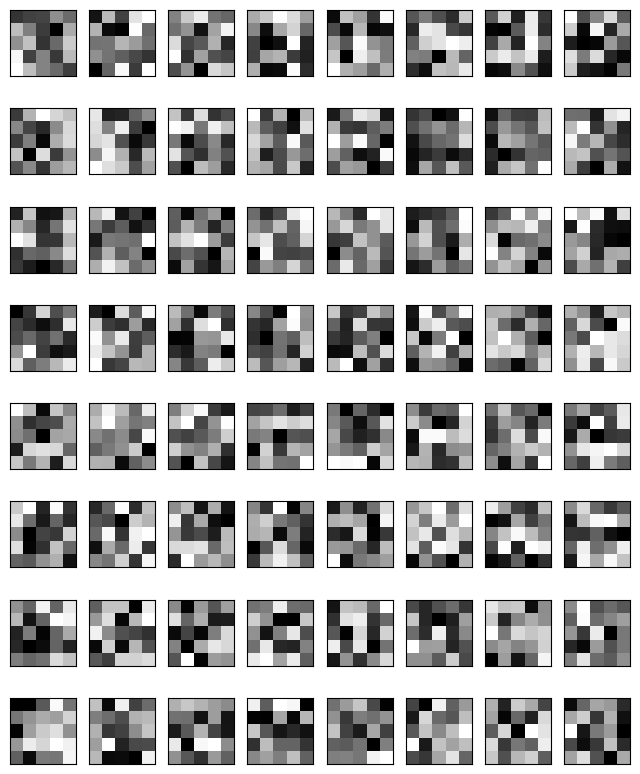

In [4]:
from matplotlib import pyplot as plt
# plot filters

fig1=plt.figure(figsize=(8, 10))
columns = 8
rows = 8
n_filters = columns * rows
for i in range(1, n_filters +1):
    f = filters[:, :, :, i-1]
    fig1 =plt.subplot(rows, columns, i)
    fig1.set_xticks([])  #Turn off axis
    fig1.set_yticks([])
    plt.imshow(f[:, :, 0], cmap='gray') #Show only the filters from 0th channel (R)
    #ix += 1
plt.show()  

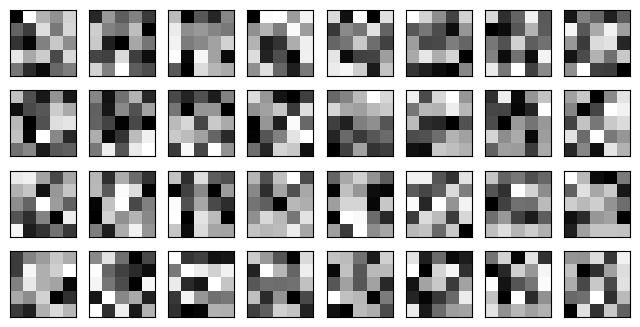

In [5]:
from matplotlib import pyplot as plt
# plot filters cvapa 2

fig1=plt.figure(figsize=(8, 4))
columns = 8
rows = 4
n_filters = columns * rows
for i in range(1, n_filters +1):
    f = filters2[:, :, :, i-1]
    fig1 =plt.subplot(rows, columns, i)
    fig1.set_xticks([])  #Turn off axis
    fig1.set_yticks([])
    plt.imshow(f[:, :, 0], cmap='gray') #Show only the filters from 0th channel (R)
    #ix += 1
plt.show()  

In [13]:
from tensorflow.keras.utils import load_img, img_to_array

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8_input (InputLayer)  [(None, 128, 128, 1)]    0         
                                                                 
 conv2d_8 (Conv2D)           (None, 124, 124, 64)      1664      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 62, 62, 32)        51232     
                                                                 
Total params: 52,896
Trainable params: 52,896
Non-trainable params: 0
_________________________________________________________________
None
1/1 [==============================] - 0s 36ms/step


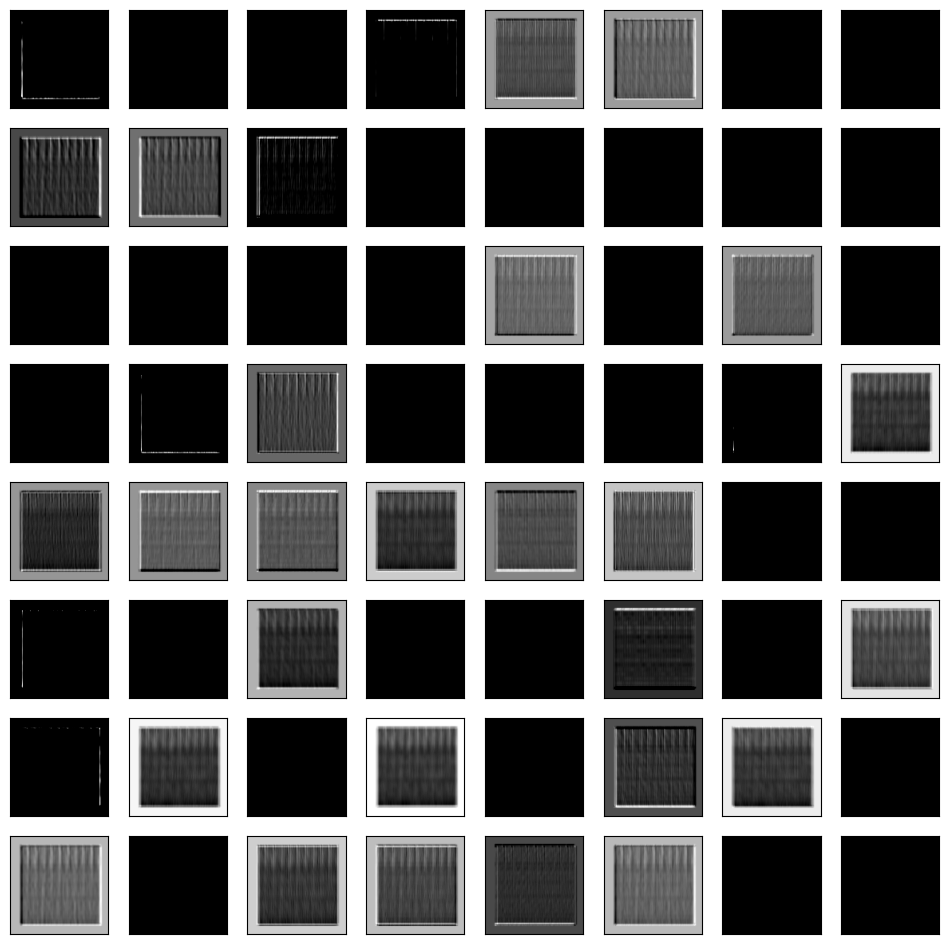

IndexError: index 32 is out of bounds for axis 3 with size 32

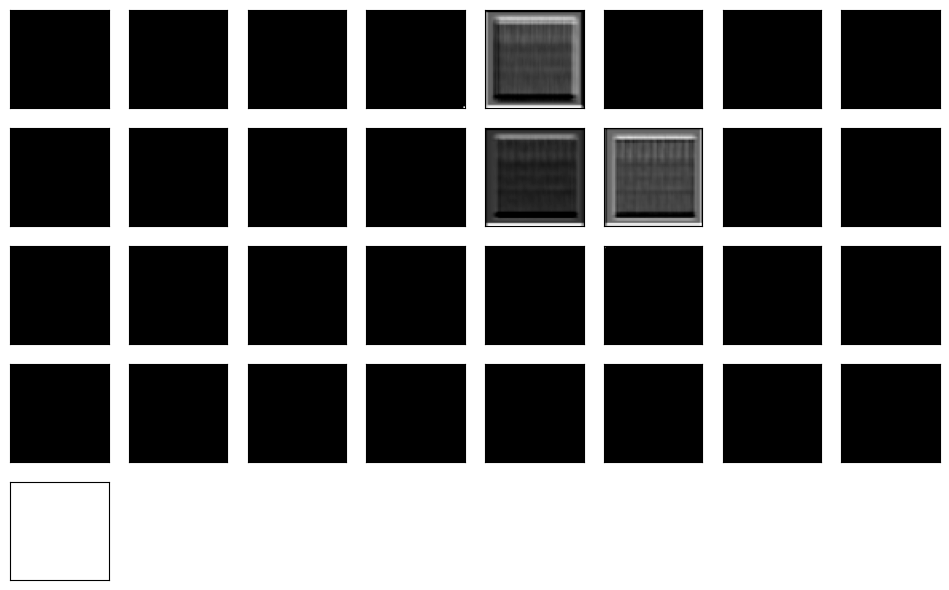

In [9]:
import numpy as np
from keras.models import Model
from PIL import Image
#Plotear respuesta de los filtros.
#Define a new truncated model to only include the conv layers of interest
#conv_layer_index = [1, 3, 6, 8, 11, 13, 15]
conv_layer_index = [0, 2]  #TO define a shorter model
outputs = [modelo_pre_entrenado.layers[i].output for i in conv_layer_index]
model_short = Model(inputs=modelo_pre_entrenado.inputs, outputs=outputs)
print(model_short.summary())


filename = 'espectrograma.png'  # Nombre de la imagen específica que deseas leer
path = filename
data = Image.open(path).convert('L')
data = data.resize((128, 128))
data = np.array(data)

# expand dimensions to match the shape of model input
data = np.expand_dims(data, axis=0)

# Generate feature output by predicting on the input image
feature_output = model_short.predict(data)


columns = 8
rows = 8
for ftr in feature_output:
    #pos = 1
    fig=plt.figure(figsize=(12, 12))
    for i in range(1, columns*rows +1):
        fig =plt.subplot(rows, columns, i)
        fig.set_xticks([])  #Turn off axis
        fig.set_yticks([])
        plt.imshow(ftr[0, :, :, i-1], cmap='gray')
        #pos += 1
    plt.show()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_636_input (InputLaye  [(None, 128, 128, 1)]    0         
 r)                                                              
                                                                 
 conv2d_636 (Conv2D)         (None, 124, 124, 64)      1664      
                                                                 
 max_pooling2d_636 (MaxPooli  (None, 62, 62, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_637 (Conv2D)         (None, 62, 62, 32)        51232     
                                                                 
Total params: 52,896
Trainable params: 52,896
Non-trainable params: 0
_________________________________________________________________
None
1/1 [==============================] - 0s 293ms/st

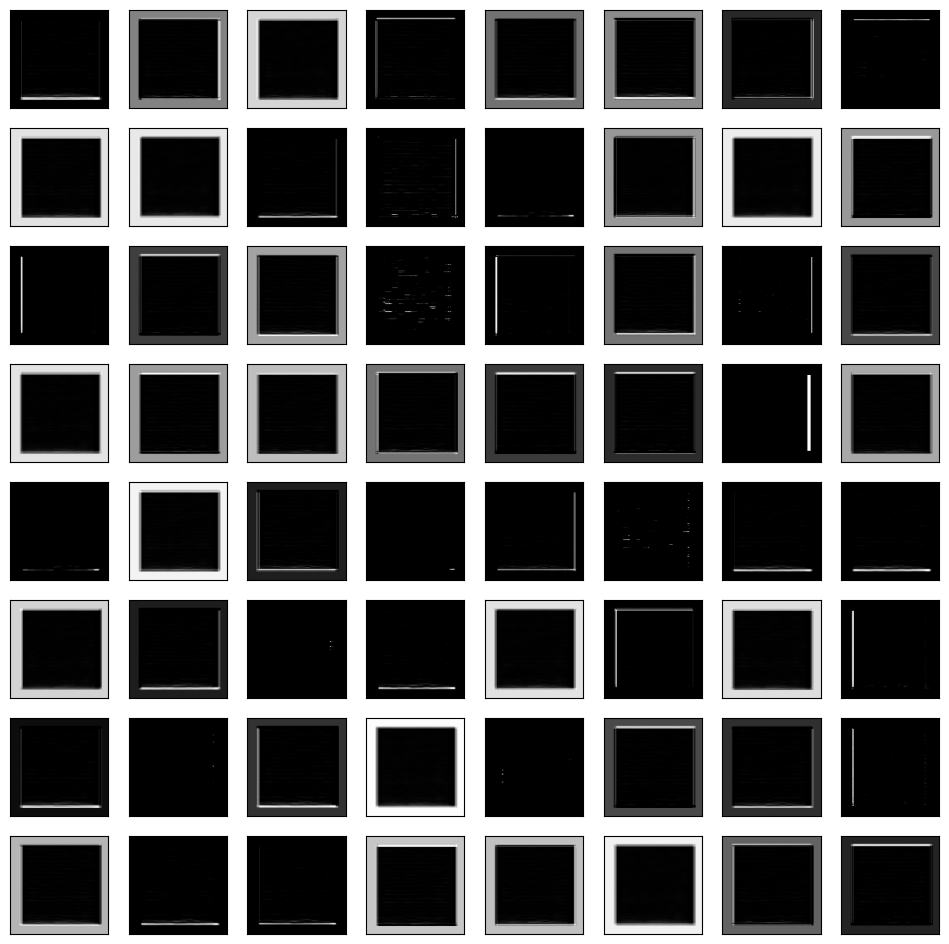

IndexError: index 32 is out of bounds for axis 3 with size 32

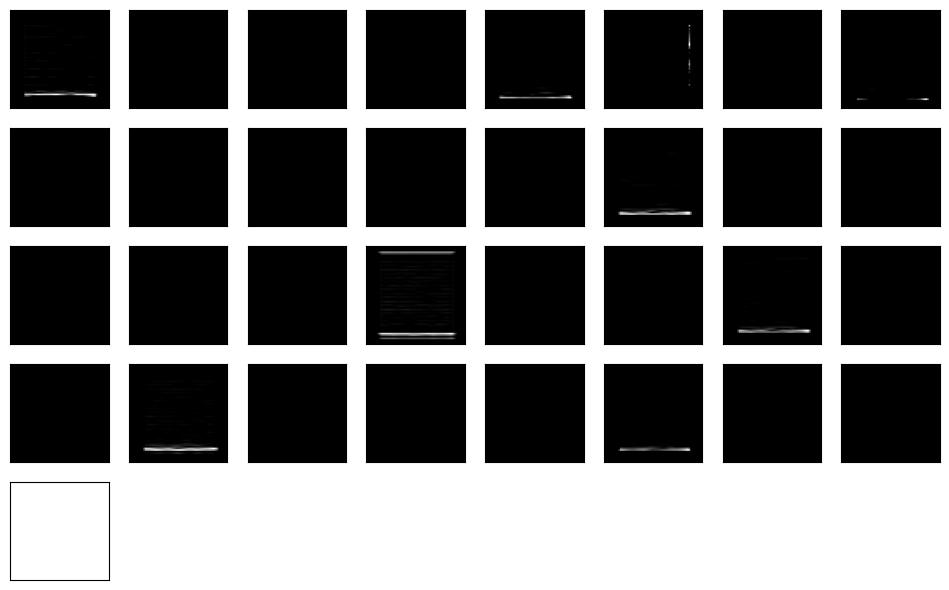

In [32]:
import numpy as np
from keras.models import Model
#Plotear respuesta de los filtros.
#Define a new truncated model to only include the conv layers of interest
#conv_layer_index = [1, 3, 6, 8, 11, 13, 15]
conv_layer_index = [0, 2]  #TO define a shorter model
outputs = [modelo_pre_entrenado.layers[i].output for i in conv_layer_index]
model_short = Model(inputs=modelo_pre_entrenado.inputs, outputs=outputs)
print(model_short.summary())

#Input shape to the model is 224 x 224. SO resize input image to this shape.
from tensorflow.keras.utils import load_img, img_to_array
img = load_img('H-D-1_16.png', target_size=(128, 128), color_mode="grayscale") #VGG user 224 as input

# convert the image to an array
img = img_to_array(img)
# expand dimensions to match the shape of model input
img = np.expand_dims(img, axis=0)

# Generate feature output by predicting on the input image
feature_output = model_short.predict(img)


columns = 8
rows = 8
for ftr in feature_output:
    #pos = 1
    fig=plt.figure(figsize=(12, 12))
    for i in range(1, columns*rows +1):
        fig =plt.subplot(rows, columns, i)
        fig.set_xticks([])  #Turn off axis
        fig.set_yticks([])
        plt.imshow(ftr[0, :, :, i-1], cmap='gray')
        #pos += 1
    plt.show()

In [87]:
# Encuentra la capa antes de la capa completamente conectada
capa_anterior = capas[-6]  # La penúltima capa
capa_anterior


In [123]:
kernels = capa_anterior.get_weights()[0]

In [124]:
print(kernels.shape)

(5, 5, 64, 32)


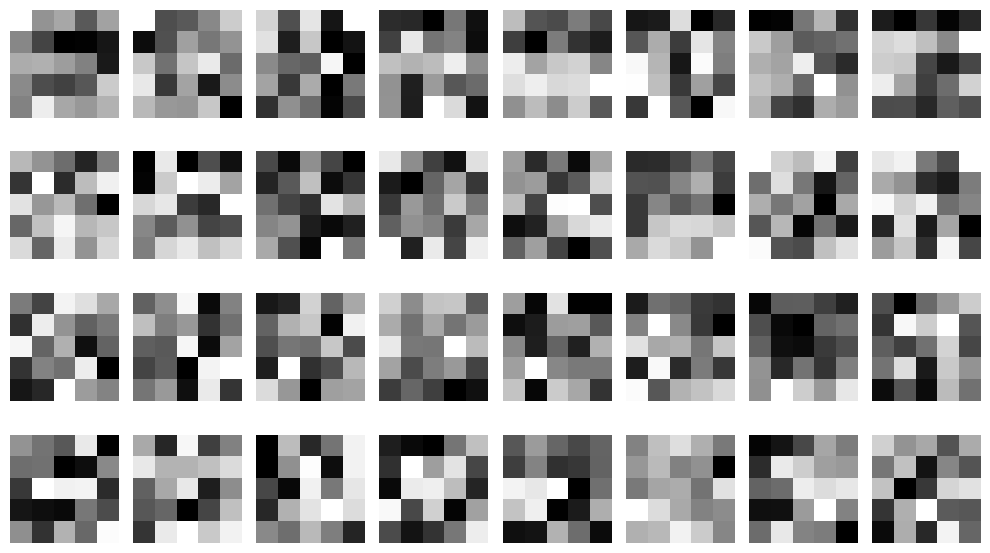

In [126]:
# Visualizar los filtros
fig, axes = plt.subplots(nrows=4, ncols=8, figsize=(10, 6))
for i, ax in enumerate(axes.flat):
    filter = kernels[:, :, 0, i]  # Obtener el filtro correspondiente
    ax.imshow(filter, cmap='gray')
    ax.axis('off')
plt.tight_layout()
plt.show()

In [130]:
weights = modelo_pre_entrenado.get_weights()

# Extraer los filtros de la última capa convolucional
last_conv_layer_filters = weights[0]  # Los pesos de la capa convolucional son los primeros en la lista de pesos

In [131]:
np.shape(weights[2])

(5, 5, 64, 32)

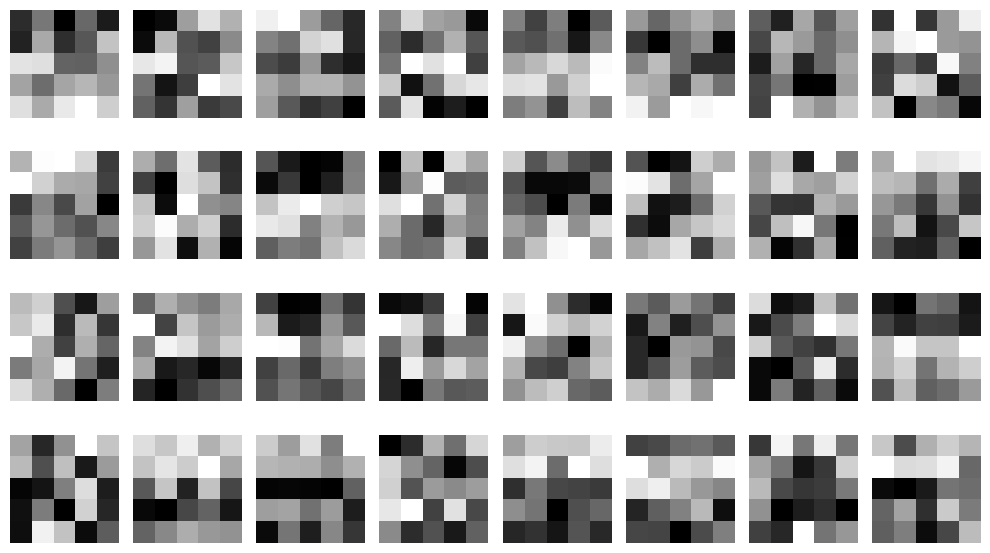

In [132]:
# Visualizar los filtros
fig, axes = plt.subplots(nrows=4, ncols=8, figsize=(10, 6))
for i, ax in enumerate(axes.flat):
    filter = last_conv_layer_filters[:, :, 0, i]  # Obtener el filtro correspondiente
    ax.imshow(filter, cmap='gray')
    ax.axis('off')
plt.tight_layout()
plt.show()

25/25 [==============================] - 0s 17ms/step


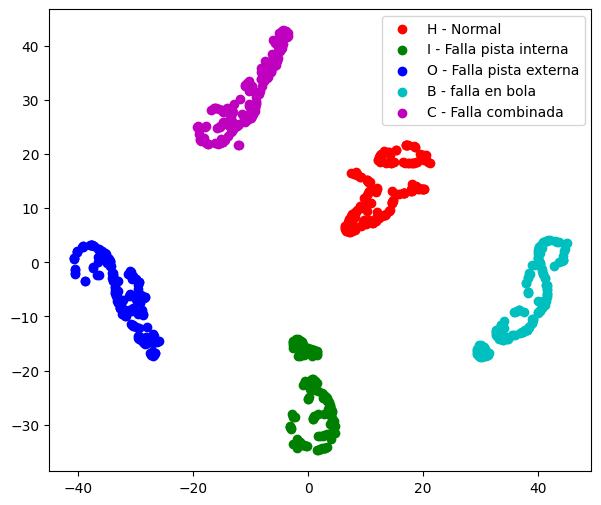

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from keras.models import load_model

# Cargar el modelo
model_path = 'resultados-cnn/models/LOCAL-10giros-16384_iter_8.h5'
model = load_model(model_path)

# Obtener las características de una capa intermedia
layer_name = 'dense_637'  # Reemplaza 'nombre_capa_intermedia' con el nombre de la capa intermedia deseada
intermediate_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

# Cargar los datos de entrada y las etiquetas correspondientes
data = x_train_3  # Aquí debes cargar tus datos de entrada (imágenes, vectores, etc.)
labels = y_train_3 # Aquí debes cargar las etiquetas correspondientes a los datos de entrada


labels = np.argmax(labels, axis=1)

# Get the intermediate layer features for the input data
features = intermediate_model.predict(data)

# Apply t-SNE to reduce dimensionality
tsne = TSNE(n_components=2, random_state=42)
embedded_features = tsne.fit_transform(features)

# Visualize the features in a scatter plot
plt.figure(figsize=(7, 6))
num_classes = len(np.unique(labels))

clases = ['H - Normal', 'I - Falla pista interna', 'O - Falla pista externa', 'B - falla en bola', 'C - Falla combinada']
colors = ['r', 'g', 'b', 'c', 'm']  # Colors for each class
for i in range(num_classes):
    plt.scatter(embedded_features[labels == i, 0], embedded_features[labels == i, 1], c=colors[i], label=clases[i])
plt.legend()
plt.show()


In [50]:
labels

array([2, 1, 1, 4, 2, 1, 2, 0, 0, 3, 3, 4, 3, 3, 4, 3, 1, 1, 0, 3, 4, 0,
       3, 3, 0, 0, 1, 0, 2, 0, 4, 2, 2, 0, 1, 3, 0, 0, 2, 3, 1, 2, 2, 4,
       3, 4, 0, 3, 3, 4, 2, 3, 2, 2, 3, 2, 2, 0, 2, 0, 3, 1, 3, 3, 0, 2,
       4, 3, 3, 4, 2, 2, 1, 4, 2, 0, 4, 2, 4, 1, 4, 2, 2, 4, 2, 0, 4, 2,
       3, 0, 0, 0, 3, 1, 4, 2, 0, 4, 0, 4, 4, 0, 1, 0, 1, 4, 0, 0, 3, 0,
       2, 1, 4, 1, 3, 3, 3, 2, 0, 3, 1, 3, 2, 4, 2, 2, 4, 3, 4, 2, 0, 1,
       4, 1, 3, 2, 1, 0, 0, 2, 3, 1, 1, 2, 3, 3, 2, 0, 4, 1, 3, 4, 4, 4,
       3, 1, 2, 0, 0, 0, 1, 3, 1, 2, 2, 0, 4, 1, 0, 1, 0, 4, 2, 3, 4, 4,
       1, 0, 4, 4, 1, 4, 2, 1, 4, 1, 4, 2, 1, 1, 1, 1, 2, 0, 1, 4, 0, 4,
       0, 3, 0, 4, 3, 1, 2, 4, 4, 0, 1, 3, 1, 0, 2, 2, 3, 1, 0, 2, 1, 3,
       2, 4, 4, 2, 1, 3, 4, 4, 1, 1, 1, 2, 4, 3, 2, 1, 0, 2, 2, 3, 1, 1,
       2, 1, 4, 2, 1, 0, 3, 2, 0, 4, 4, 2, 4, 3, 4, 0, 2, 2, 3, 1, 3, 3,
       3, 2, 4, 1, 0, 3, 3, 4, 4, 4, 2, 4, 4, 1, 4, 4, 2, 2, 2, 3, 0, 2,
       0, 2, 0, 0, 1, 0, 0, 4, 0, 3, 3, 2, 4, 3, 2,

In [39]:
labels[0].shape

(5,)

In [43]:
def prepros_bancoimagenes3(mydir, test_size, val_size):
    #Lectura en array de imagenes, preprocesamiento a grises y reescalamiento a 128x128
    X = [] 
    for name in listdir(mydir) :
        path = join( mydir,name) 
        data = Image.open(path).convert('L')
        data = data.resize((128,128))
        data = np.array(data)
        X.append(data) 
    X = np.array(X) 
    print(X.shape) 

    y =[]
    for name in listdir(mydir) :
        path = join( mydir,name) 
        if name[0] == 'H':
            y.append(0)
        if name[0] == 'I':
            y.append(1)
        if name[0] == 'O':
            y.append(2)
        if name[0] == 'B':
            y.append(3)
        if name[0] == 'C':
            y.append(4)
    y = np.array(y) 
    print(y.shape) 
    
    # Dividir datos de test y entrenamiento.
    x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify = y)
    
    #Dividir los datos de train en entrenamiento y validación.
    x_train,x_val,y_train,y_val = train_test_split(x_train, y_train, test_size=val_size, random_state=42, stratify = y_train)
    
    #Normalización
    x_train = x_train.astype("float32") / 255
    x_val= x_val.astype("float32") / 255
    x_test = x_test.astype("float32") / 255
    
    #Agregar dimensión extra
    x_train = np.expand_dims(x_train, -1) 
    x_val = np.expand_dims(x_val, -1) 
    x_test = np.expand_dims(x_test, -1) 
    
    #One hot encoder
    y_train = keras.utils.to_categorical(y_train, 5)
    y_val = keras.utils.to_categorical(y_val, 5)
    y_test = keras.utils.to_categorical(y_test, 5)

    return x_train, x_test, x_val, y_train, y_test, y_val, X, y

In [44]:
mydir_3 = r"banco_mfpt/Banco_LOCAL_COLOR" 
x_train_3, x_test_3, x_val_3, y_train_3, y_test_3, y_val_3, X, y = prepros_bancoimagenes3(mydir_3, 0.2, 0.1)

(1086, 128, 128)
(1086,)
